Prep work:

*   Download student csv predictions from I-Learn
*   Rename files to team8-module2-predictions.csv where team8 is the name of the team
*   Make sure file is one column and remove any extra columns
*   Make sure the heading is set to "predictions" (without quotes)
*   Upload student csv predictions to session storage area.
*   Upload module2-holdout-answers.csv found in the Canvas module (DO NOT SHARE THIS FILE)
*   Run the notebook






In [ ]:
# MODULE 02 - BANK HOLDOUT GRADING

from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

level_for_top_score = 7200
level_for_bottom_score = 5500

# READ IN THE CSV FILES
team_dir = Path("./")
teams = team_dir.glob("*-predictions.csv")
team_list = []
for team in teams:
  # print(latent_file)
  team_list.append((str(team).split("-",1)[0],team))

# print(team_list)

In [ ]:
# READ IN THE HOLDOUT ANSWERS
targets_file = "module2-holdout-answers.csv"
targets = pd.read_csv(targets_file)
# targets

In [ ]:
# ARE THE STUDENT DATASETS THE CORRECT LENGTH
student_datasets = {}
for (group, file) in team_list:
  ds = pd.read_csv(file)
  
  if ds.shape != targets.shape:
    if ds.shape[1] == 2 and ds.shape[0] == targets.shape[0]:
      ds = ds.drop(ds.columns[[0]],axis = 1)
      student_datasets[group] = ds
      print(f"Group {group} added successfully after removing extra index column")      
    else:
      print(f"Error group {group} ds had {ds.shape} rows and columns instead of the expected {targets.shape}. It will be excluded.")
  else:
    student_datasets[group] = ds
    print(f"Group {group} added successfully")

Group team3 added successfully
Group team9 added successfully
Group team2 added successfully
Group team8 added successfully
Group team6 added successfully
Group team5 added successfully
Error group team10_bank ds had 1515 rows instead of the expected 4119. It will be excluded.
Group team4 added successfully
Group team1 added successfully


In [ ]:
# student_datasets

In [ ]:
def recommended_grade(amount):
  '''
  A simple min max scaler to identify a recommended score for the holdout set
  '''
  min_allowed = level_for_bottom_score
  max_allowed = level_for_top_score
  if amount>max_allowed:
    return 100
  elif amount<min_allowed:
    return 0
  else:
    return (amount - min_allowed) / (max_allowed - min_allowed)*100
    

In [ ]:
def value_of_calls(incorrect_calls, correct_calls):
  '''
  This function is based on assumptions about bank employee wages, time requirements,
  average savings amounts, and net interest margin. Wages, average savings, and net interest margin,
  were pulled from the time range of the dataset. Assumptions were made about time on call and the 
  percentage of a person's total savings they'd be willing to put into a term deposit.
  '''
  time_on_call = .5
  wage = -11 # minimum wage is 6.50 and typicall teller wage is 11
  call_cost = wage*time_on_call
  average_savings = 4960
  percent_in_term_deposit = .75
  net_interest_margin = .012
  positive_call_benefit = average_savings*percent_in_term_deposit*net_interest_margin
  total_earned = incorrect_calls*call_cost + correct_calls*call_cost + correct_calls*positive_call_benefit
  return total_earned


In [ ]:
results_dict = {}

In [ ]:
for group, student_ds in student_datasets.items():
  student_dict = {}
  cm = confusion_matrix(student_ds, targets)
  # print(group,cm)
  student_dict["Incorrect Calls"] = cm[1][0]
  student_dict["Correct Calls"] = cm[1][1]
  student_dict["Value of Calls"] = value_of_calls(cm[1][0],cm[1][1])
  student_dict["Grade"] = recommended_grade(student_dict['Value of Calls'])

  results_dict[group] = student_dict

In [ ]:
# results_dict

In [ ]:
results_df = pd.DataFrame(results_dict)
results_ds_trans = results_df.transpose()
results_ds_trans = results_ds_trans.drop(columns=["Grade"])
results_ds_trans = results_ds_trans.round(2)
results_ds_trans = results_ds_trans.sort_values(by="Value of Calls",ascending=False)
# results_ds_trans.to_csv("class_results.csv")
# results_ds_trans

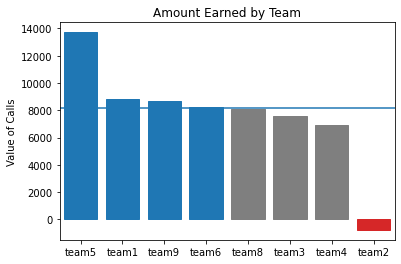

,Incorrect Calls,Correct Calls,Value of Calls
team5,166.0,374.0,13725.36
team1,459.0,291.0,8865.24
team9,186.0,248.0,8683.72
team6,357.0,261.0,8252.04
team8,512.0,279.0,8104.06
team3,616.0,281.0,7610.34
team4,968.0,313.0,6926.82
team2,3001.0,402.0,-771.22


In [ ]:
# GENERATE GRAPHICS FOR TEAMS 
# THESE CAN BE SHARED WITH THE STUDENTS

graph = sns.barplot(data=results_ds_trans,y="Value of Calls",x=results_ds_trans.index)
graph.set_title("Amount Earned by Team")
graph.axhline(level_for_top_score)
for bar in graph.patches:
    if bar.get_height() > level_for_top_score:
        bar.set_color('tab:blue') 
    elif bar.get_height() <0:
      bar.set_color('tab:red')         
    elif bar.get_height() < level_for_bottom_score:
      bar.set_color('tab:orange')  
    else:
        bar.set_color('tab:grey')
#The plot is shown
plt.show()
results_ds_trans

In [ ]:
results_df = pd.DataFrame(results_dict)
results_ds_trans = results_df.transpose()
results_ds_trans = results_ds_trans.round(0)
results_ds_trans = results_ds_trans.sort_values(by="Value of Calls",ascending=False)
results_ds_trans.to_csv("class_results.csv")
results_ds_trans

,Incorrect Calls,Correct Calls,Value of Calls,Grade
team5,166.0,374.0,13725.0,100.0
team1,459.0,291.0,8865.0,100.0
team9,186.0,248.0,8684.0,100.0
team6,357.0,261.0,8252.0,100.0
team8,512.0,279.0,8104.0,96.0
team3,616.0,281.0,7610.0,73.0
team4,968.0,313.0,6927.0,42.0
team2,3001.0,402.0,-771.0,0.0
